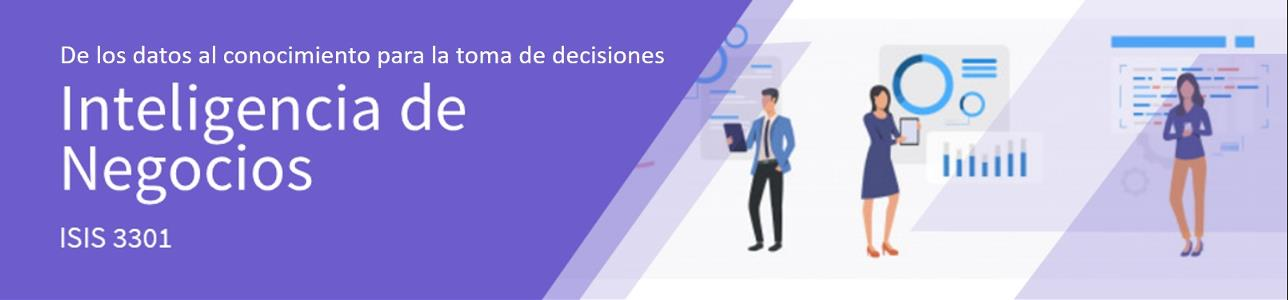

## Problema
<p style="text-align: justify;"> El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y Turística de Colombia  COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.
Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos.
Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos
actores quieren lograr un análisis independiente de los conjuntos de datos y al final del
proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que
acompañarán el desarrollo real de este proyecto.

### 1. Instalación e importanción de librerías.


In [1]:
# # librería para manejar las flexiones gramaticales en el idioma inglés.
#!pip install inflect
#!pip install scikit-plot
#!pip install pattern
#!pip install pandas-profiling[notebook]
#!pip install pandas-profiling --upgrade
#!pip install seaborn

# Imports de librerias:

Pandas: Liberia utilizada para el manejo y visualizacion de los datos.

Numpy: Libreria utilizada para manejar mejor arrays y los valores numericos.

Sklearn: Utilizada para la implementacion de los modelos de ML para la tarea de clasificacion.

Nltk: Libreria utilizada para utilizar funciones relacionadas al procesamiento del texto.

Pattern:  Libreria utilizada para utilizar funciones relacionadas al procesamiento del texto en español.

Wordcloud: Utilizada para la visualizacion de palabras segun su frecuencia.

In [2]:

import pandas as pd

import seaborn as sns

import numpy as np

import sys

import re

import unicodedata

from scipy import stats as st

import inflect

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.corpus import wordnet
import nltk

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from pattern.es import parse

from collections import defaultdict

from wordcloud import WordCloud




In [3]:
# librería Natural Language Toolkit, usada para trabajar con textos
# Punkt permite separar un texto en frases.

nltk.download('putrkt')
nltk.download('wordnet')
nltk.download('omw')
stemmer_es = SnowballStemmer('spanish')
lemmatizer_es = WordNetLemmatizer()
# Descargar los recursos necesarios para NLTK en español
nltk.download('omw')  # Descargar el WordNet en español
stemmer_es = SnowballStemmer('spanish')
lemmatizer_es = WordNetLemmatizer()


[nltk_data] Error loading putrkt: Package 'putrkt' not found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos.

In [4]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('tipo1_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')
data_t=data


Como podemos ver a continuacion, los datos se tratan de una coleccion de reseñas respecto a las experiencias de usuarios de restaurantes u hoteles. A grandes rasgos, no podemos entender bien las justificaciones porque cada texto esta asignado a cada clase, por esta razon es importante realizar un analisi para determinar que mas hacer.

In [5]:
print(data_t.head())

                                              Review  Class
0  Nos alojamos en una casa alquilada en la ciuda...      4
1  La comida está bien, pero nada especial. Yo te...      3
2  En mi opinión, no es una como muchos usuarios ...      3
3  esta curiosa forma que asemeja una silla de mo...      4
4  Lo mejor era la limonada. Me gusto la comida d...      2


A continuacion, podemos evidenciar que no existen valores nulos. Ademas, hemos valdiado que todos los datos tienen su respectiva etiqueta. Por ultimo, los tipos de datos estan bien porque Review es el texto en si y Class es la etiqueta numerica: ambos tipos de datos coinciden.

In [6]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


En esta etapa, tambien podemos observar que trabajaremos con 5 categorias, iniciando desde el 1 hasta el 5.

Ahora, revisaremos la distribucion de etiquetas en los datos. Como estamos viendo, los valores estan muy desblanceados porque hay diferencias muy grandes entre los conteos. Por ejemplo, el conteo de la etiqueta 1 es mas de dos veces mas pequeño que el conteo de la etiqueta 5.

In [7]:
data_t['Class'].value_counts()


Class
5    2350
4    1971
3    1568
2    1173
1     813
Name: count, dtype: int64

# Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.

Los textos en el conjunto de datos tienen una longitud promedio de aproximadamente 408 palabras, lo que sugiere que los usuarios están proporcionando reseñas detalladas y elaboradas sobre su experiencia.
La variabilidad en la longitud de los textos es notable, como lo indica la alta desviación estándar de aproximadamente 474.15. Esto implica que algunos usuarios escriben reseñas muy extensas, mientras que otros optan por ser más concisos.

Se observa una amplia gama de longitudes de texto, desde tan solo 9 palabras hasta un máximo de 10,403 palabras. Esto sugiere que las reseñas varían significativamente en términos de su profundidad y detalle.
La mayoría de los textos se encuentran dentro del rango de longitud de 196 a 488 palabras, lo que indica que la mayoría de los usuarios proporcionan reseñas moderadamente detalladas.



## Analisis en terminos del contenido de los datos:

La presencia de textos muy cortos (9 palabras) podría indicar que algunos usuarios expresan opiniones breves y directas, mientras que la existencia de textos muy largos (más de 10,000 palabras) sugiere que otros usuarios están dispuestos a compartir experiencias más exhaustivas y completas.
La mediana de la longitud de los textos, que es de 269 palabras, indica que la mitad de las reseñas son de longitud moderada, lo que sugiere que los usuarios tienden a proporcionar un nivel razonable de detalle en sus coentarios.

El promedio de palabras por texto es de aproximadamente 70.82. Esto quiere decir que, en promedio, cada reseña contiene una cantidad considerable de palabras, lo que indica una expresión detallada de la opinión del usuario.
La desviación estándar de alrededor de 82.40 indica que la cantidad de palabras varía considerablemente entre las reseñas, lo que sugiere una diversidad en la extensión de las opiniones expresadas.
Longitud de las Palabras:

La longitud promedio de la palabra más larga en cada texto es de aproximadamente 12.94 caracteres. Esto indica que, en promedio, las palabras utilizadas en las reseñas son relativamente largas.
La longitud mínima promedio de las palabras es de alrededor de 1.08 caracteres, lo que sugiere que la mayoría de las palabras son de longitud corta, probablemente compuestas principalmente por letras o caracteres comunes.
Posibles Tendencias:

La mediana de la cantidad de palabras, que es de 45, indica que la mitad de las reseñas tienen una longitud de palabras moderada. Esto sugiere que la mayoría de los usuarios proporcionan opiniones que no son ni demasiado breves ni excesivamente largas.
La presencia de textos con una cantidad mínima de palabras (2 palabras) podría indicar que algunos usuarios expresan opiniones extremadamente breves, mientras que la presencia de textos con una cantidad máxima de palabras (1809 palabras) sugiere que otros usuarios están dispuestos a proporcionar reseñas muy detalladas y elaboradas.

In [8]:


textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Longitud'] = textos['Review'].apply(len)
textos['Cantidad_palabras'] = textos['Review'].apply(lambda x: len(x.split()))
textos['Longitud_max_palabra'] = textos['Review'].apply(lambda x: max(len(word) for word in x.split()))
textos['Longitud_min_palabra'] = textos['Review'].apply(lambda x: min(len(word) for word in x.split()))

print(textos.describe())


             Class        Conteo          Max          Min      Longitud  \
count  7875.000000   7875.000000  7875.000000  7875.000000   7875.000000   
mean      3.491683    407.945016    13.211429     0.848254    407.945016   
std       1.328275    434.744952     3.125050     0.507458    434.744952   
min       1.000000     33.000000     7.000000     0.000000     33.000000   
25%       2.000000    201.000000    11.000000     1.000000    201.000000   
50%       4.000000    271.000000    13.000000     1.000000    271.000000   
75%       5.000000    503.000000    14.000000     1.000000    503.000000   
max       5.000000  14129.000000   125.000000     4.000000  14129.000000   

       Cantidad_palabras  Longitud_max_palabra  Longitud_min_palabra  
count        7875.000000           7875.000000           7875.000000  
mean           70.889778             13.007238              1.074159  
std            76.289629              2.910846              0.264458  
min             6.000000       

Posteriormente, realizando el analisis del conteo por palabras nos dimos cuenta de que la mayoria de palabras no dicen nada para el modelo, es decir, podrian Stop_Words y quizas es mejor eliminarlas porque no ayudan a clasificar al ser palabras tan comunes para el español.


In [9]:
from collections import Counter


all_text = ' '.join(textos['Review'])
words = all_text.split()
word_freq = Counter(words)
top_10_words = word_freq.most_common(10)

print("Las 10 palabras más comunes son:")
for word, freq in top_10_words:
    print(f"{word}: {freq} veces")


Las 10 palabras más comunes son:
de: 24951 veces
y: 18925 veces
la: 17514 veces
que: 15559 veces
en: 13490 veces
el: 13113 veces
es: 8523 veces
a: 8316 veces
un: 8154 veces
no: 6984 veces


In [10]:
print(textos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Review                7875 non-null   object
 1   Class                 7875 non-null   int64 
 2   Conteo                7875 non-null   int64 
 3   Max                   7875 non-null   int64 
 4   Min                   7875 non-null   int64 
 5   Longitud              7875 non-null   int64 
 6   Cantidad_palabras     7875 non-null   int64 
 7   Longitud_max_palabra  7875 non-null   int64 
 8   Longitud_min_palabra  7875 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 553.8+ KB
None


### 3. Preparación de datos

#### **3.1 Limpieza de los datos**
Teniendo en cuenta que los textos pueden venir de varias fuentes y realmente no hay estandarizacion, debemos realizar una limpieza a los textos para poder aplicar el algoritmo.


# Tecnicas y transformaciones hechas:

## Limpieza de texto:
Inicialmente, es necesario que todo el texto quede en minuscula y se eliminen los caracteres especiales para facilitar el procesamiento al reducir el numero de palabras (Recordemos que es posible que una palabra se escriba de varias manera pero siga significando lo mismo). Ademas, sabemos que los caracteres especiales no aportan nada a la toma de decisiones.

## Expandir contracciones:

Hay palabras en español que son formas cortas de decir una cosa. Por esta razon, es importante hacer que la palabra se entienda para poder hacer que el modelo pueda entenderlo y agruparlo con palabras que puedan denotar el significado que requieren. Ademas, en esta etapa se aprovecha para estandarizar palabras (Recordemos que existen los sinonimos). Por otro lado, tambien se puede utilizar para cambiar palabras por un sinonimo mas extenso para evitar que se elimine como si de un StopWord se tratara (Ejemplo, en este caso se borra la palabra NO y es realmente importante).

## Filter Substrings:

Existen palabras que podrian no ser contadas como StopWords, a pesar de que lo son, ademas estas palabras pueden tener varriaciones que inician o tienen cierta subcadena en comun. Por esta razon, cree una funcion para borrar esas palabras en caso de ser necesario.

## Eliminar StopWord

Como el nombre lo indica, este paso buscara las StopWords de la lengua española y las eliminara. De esta manera, estaremos reduciendo el campo de busqueda y al mismo tiempo se eliminan palabrar que posiblemente no aporten nada al modelo.

## Eliminacion de risas.

En texto es muy comun que las personas manden risas en texto, sin embargo estas risas no estan siendo tomadas en cuenta para lo que se quiere decir. En otras palabras, las risas no aportan a la clasificacion porque podrian utilizarse de igual manera en mas de una cateogira.

In [11]:

nltk.download('stopwords')
p = inflect.engine()
# Definir stopwords en español
stopwords_es = set(stopwords.words('spanish'))
contracciones = {
    "hotel": "",
    "si": "",
    "nacionál": "",
    "naciones": "",
    "útlimo": "nuestro",
    "si": "si",
    "tengo": "yo tengo",
    "tu": "tu",
    "tus": "tu",
    "un": "uno",
    "calidad": "cali",
    "excelent": "excelente",
    'experient': 'experiencia',
    'tom': '',
    'hor': 'horrible',
    'aqui': '',
    'aquí':'',
    'no':'negacion',
    'lugar': 'sitio',
    'establecimiento':'sitio'

}
substrings_to_remove = ['aloj']

def remove_non_ascii(texto):
    """Remove non-ASCII characters from a string"""
    new_texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-zA-Záéíóúüñ\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto)

    return texto

def expandir_contracciones(texto):
    palabras = texto.split()
    palabras_expandidas = [contracciones.get(palabra, palabra) for palabra in palabras]
    texto_expandido = ' '.join(palabras_expandidas)
    return texto_expandido

def filter_substrings(texto):
    expanded_document = expandir_contracciones(texto)
    filtered_document = []
    for word in expanded_document.split():
        # Verificar si la palabra es una subcadena de alguna otra palabra en el documento
        is_substring = any(substring in word for substring in substrings_to_remove)
        # Si no es una subcadena, agregarla a las palabras filtradas
        if not is_substring:
            filtered_document.append(word)
    # Unir las palabras filtradas en un nuevo documento
    filtered_texto = " ".join(filtered_document)
    return filtered_texto


def eliminar_stopwords(texto):
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_es]
    texto_filtrado = ' '.join(palabras_filtradas)
    return texto_filtrado


def eliminar_risas(texto):
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if "jaj" not in stopwords_es]
    texto_filtrado = ' '.join(palabras_filtradas)
    return texto_filtrado



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data_t['Review'] = data_t['Review'].apply(eliminar_risas)
data_t['Review'] = data_t['Review'].apply(limpiar_texto)
data_t['Review'] = data_t['Review'].apply(expandir_contracciones)
data_t['Review'] = data_t['Review'].apply(eliminar_stopwords)
data_t['Review'] = data_t['Review'].apply(filter_substrings)
data_t['Review'] = data_t['Review'].apply(remove_non_ascii)

print(data_t)

                                                 Review  Class
0     casa alquilada ciudad amurallada parecia tan s...      4
1     comida bien especial mejor comida mexcan unido...      3
2     opinion negacion usuarios reclaman gran palada...      3
3     curiosa forma asemeja silla montar ahi nombre ...      4
4           mejor limonada gusto comida mundo sosa frio      2
...                                                 ...    ...
7870  motivo estancia vine congreso medico hospedaro...      3
7871  dificil revisar castillo apenas podiamos camin...      3
7872  si vas merida negacion puedes perderte sitio n...      5
7873  imperdible sitio lleva nombre conquistador joy...      5
7874  festejando dia amor amistad remonta restaurant...      3

[7875 rows x 2 columns]


#### **3.2 Tokenización**

La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Ademas, la tokenización permite contar la frecuencia de cada palabra en un texto y determinar su importancia para el sentimiento general expresado. En la traducción automática, la tokenización es necesaria para alinear correctamente las palabras de origen y destino.

En este caso, vamos a utilizar la tokenizacion para representar las palabras, en este caso caracteristicas, para poder pasarselas al modelo. En esta parte, utilizamos parse, metodo extraido de Patters.es, de tal manera que se hace tokenizacion para palabras en español.


In [13]:


def tokenize_spanish(text):
    parsed_text = parse(text, tokenize=True, tags=False, chunks=False)
    tokens = [token[0] for sentence in parsed_text.split() for token in sentence]
    return tokens

# Aplicar la tokenización a la columna 'Review' y crear una nueva columna 'words' con los tokens
data_t['words'] = data_t['Review'].apply(tokenize_spanish)


En esta parte, eliminaremos los valores nulos en caso de ser necesario.

In [14]:
data_t['words'].dropna()

0       [casa, alquilada, ciudad, amurallada, parecia,...
1       [comida, bien, especial, mejor, comida, mexcan...
2       [opinion, negacion, usuarios, reclaman, gran, ...
3       [curiosa, forma, asemeja, silla, montar, ahi, ...
4       [mejor, limonada, gusto, comida, mundo, sosa, ...
                              ...                        
7870    [motivo, estancia, vine, congreso, medico, hos...
7871    [dificil, revisar, castillo, apenas, podiamos,...
7872    [si, vas, merida, negacion, puedes, perderte, ...
7873    [imperdible, sitio, lleva, nombre, conquistado...
7874    [festejando, dia, amor, amistad, remonta, rest...
Name: words, Length: 7875, dtype: object

In [15]:
print(data_t.head())

                                              Review  Class  \
0  casa alquilada ciudad amurallada parecia tan s...      4   
1  comida bien especial mejor comida mexcan unido...      3   
2  opinion negacion usuarios reclaman gran palada...      3   
3  curiosa forma asemeja silla montar ahi nombre ...      4   
4        mejor limonada gusto comida mundo sosa frio      2   

                                               words  
0  [casa, alquilada, ciudad, amurallada, parecia,...  
1  [comida, bien, especial, mejor, comida, mexcan...  
2  [opinion, negacion, usuarios, reclaman, gran, ...  
3  [curiosa, forma, asemeja, silla, montar, ahi, ...  
4  [mejor, limonada, gusto, comida, mundo, sosa, ...  


#### **3.3. Normalización**
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

Lemmatizacion: Es buena idea utilizarlo porque permite reducir una palabra a su version base, de tal manera que se quitan las conjugaciones y se empieza a agrupar por conceptos. Esto es realmente util para el modelo porque le permite identificar las similitudes de palabras que significan lo mismo pero estan representadas con diferente palabras.

Stemming: Al igual que la lematizacion, permite que las palabras sean interpretadas por su significado mas que por su forma de escribirse. En este caso, no se busca llevar a su forma raiz, sino que se eliminan los prefijos y sufijos de la palabra.

Con ayuda de los dos procesos anteriores, podremos garantizar que el modelo podra agrupar palabras con significados semejantes y entender las relaciones que puede llegar a tener.

In [16]:


def stem_words(words):
    """Stem words in list of tokenized words"""
    stems = [stemmer_es.stem(word) for word in words]
    return stems

def lemmatize_words(words):
    """Lemmatize words in list of tokenized words"""
    lemmas = [lemmatizer_es.lemmatize(word) for word in words]
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_words(words)

    return stems + lemmas

# Aplicar stem_and_lemmatize a la columna 'words'
data_t['words'] = data_t['words'].apply(stem_and_lemmatize)
print(data_t.head())



                                              Review  Class  \
0  casa alquilada ciudad amurallada parecia tan s...      4   
1  comida bien especial mejor comida mexcan unido...      3   
2  opinion negacion usuarios reclaman gran palada...      3   
3  curiosa forma asemeja silla montar ahi nombre ...      4   
4        mejor limonada gusto comida mundo sosa frio      2   

                                               words  
0  [cas, alquil, ciud, amurall, pareci, tan, segu...  
1  [com, bien, especial, mejor, com, mexc, unid, ...  
2  [opinion, negacion, usuari, reclam, gran, pala...  
3  [curios, form, asemej, sill, mont, ahi, nombr,...  
4  [mejor, limon, gust, com, mund, sos, fri, mejo...  


Posterior a la transformacion, volvemos unir las palabras para volverlas un texto.

In [17]:

data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
print(data_t)

                                                 Review  Class  \
0     casa alquilada ciudad amurallada parecia tan s...      4   
1     comida bien especial mejor comida mexcan unido...      3   
2     opinion negacion usuarios reclaman gran palada...      3   
3     curiosa forma asemeja silla montar ahi nombre ...      4   
4           mejor limonada gusto comida mundo sosa frio      2   
...                                                 ...    ...   
7870  motivo estancia vine congreso medico hospedaro...      3   
7871  dificil revisar castillo apenas podiamos camin...      3   
7872  si vas merida negacion puedes perderte sitio n...      5   
7873  imperdible sitio lleva nombre conquistador joy...      5   
7874  festejando dia amor amistad remonta restaurant...      3   

                                                  words  
0     cas alquil ciud amurall pareci tan segur cualq...  
1     com bien especial mejor com mexc unid margarit...  
2     opinion negacion usuari rec

Agregamos tokenizacion con spacy. Esto es especifico para ejecutar el modelo de las LSTM. Ademas obtenemos los embeddings tambien de spacy.

Primero tenemos que eliminar las cadenas que tienen longitudes outliers. Esto lo hacemos para que al poner padding a las secuencias no tengamos que usar memoria excesiva.


In [18]:
data_t['longitud_reviews'] = data_t['Review'].apply(lambda x: len(x.split()))

estadisticas_longitud_reviews = data_t['longitud_reviews'].describe()


print(estadisticas_longitud_reviews)


count    7875.000000
mean       35.291302
std        37.118794
min         4.000000
25%        17.000000
50%        24.000000
75%        44.000000
max      1208.000000
Name: longitud_reviews, dtype: float64


podemos ver que la mayoria de reviews no tienen mas de 44 palabras. sin embargo, las mas largas llegan a tener 1200 palabras.

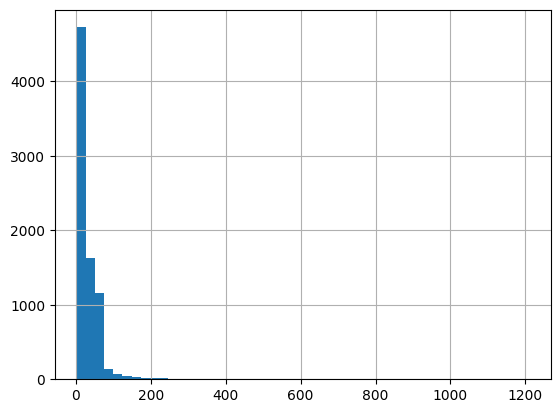

In [19]:
data_t['longitud_reviews'].hist(bins=50)
plt.show()

eliminamos los outliers. Es decir, los que estan 1.5 mas arriba del rango iqr

In [20]:
data_ta = data_t.copy()
data_ta['longitud_reviews'] = data_ta['words'].apply(lambda x: len(x.split()))
Q1 = data_ta['longitud_reviews'].quantile(0.25)
Q3 = data_ta['longitud_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir outliers
data_ta = data_ta[(data_ta['longitud_reviews'] >= limite_inferior) & (data_ta['longitud_reviews'] <= limite_superior)]

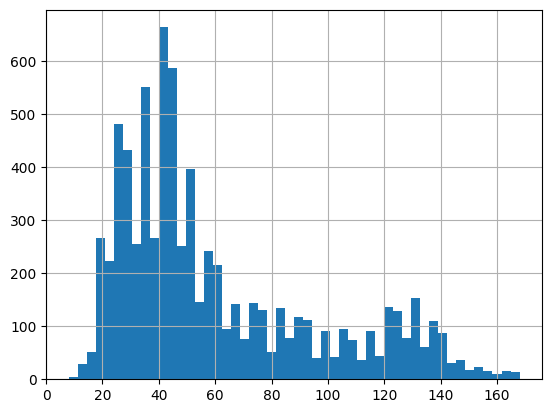

In [21]:
data_ta['longitud_reviews'].hist(bins=50)
plt.show()

Ahora solo toca hacer padding a las secuencias hasta los 150 palarbas

In [22]:
estadisticas_longitud_reviews = data_ta['longitud_reviews'].describe()


print(estadisticas_longitud_reviews)

count    7558.000000
mean       60.231278
std        35.970294
min         8.000000
25%        34.000000
50%        46.000000
75%        80.000000
max       168.000000
Name: longitud_reviews, dtype: float64


Descargamos el modeo de spacy para espaniol grande.

In [23]:
#!python -m spacy download es_core_news_lg

Obtenemos los embeddings correspondientes para cada token. Un embedding es u vector que representa cada palabra. Un review entonces es una lista de embeddings. Se hace padding a cada review para que cada review tenga la misma longitud.

In [24]:
import spacy
import pandas as pd



nlp = spacy.load('es_core_news_lg')

# Definir una función para tokenizar un texto utilizando spaCy y obtener los embeddings
def tokenizar_y_obtener_embeddings(texto):
    doc = nlp(texto)
    tokens = [token.text for token in doc]
    embeddings = [token.vector for token in doc]
    return tokens, embeddings


# Aplicar la función para obtener tanto los tokens como sus embeddings
data_ta['tokens_embeddings'] = data_ta['words'].apply(tokenizar_y_obtener_embeddings)


data_ta[['tokens', 'embeddings']] = pd.DataFrame(data_ta['tokens_embeddings'].tolist(), index=data_ta.index)


data_ta.drop(columns=['tokens_embeddings'], inplace=True)

# Ahora, data_t contiene las columnas 'tokens' y 'embeddings':
# - 'tokens' es una lista de tokens de cada Review.
# - 'embeddings' es una lista de arrays numpy, donde cada array es el embedding de un token correspondiente.


In [25]:
data_ta['tokens'].dropna()
longitud_maxima_secuencia = data_ta['embeddings'].apply(len).max()

def aplicar_padding_embeddings(embeddings, longitud_maxima_secuencia):
    padding_necesario = longitud_maxima_secuencia - len(embeddings)
    if padding_necesario > 0:
        dim_embedding = len(embeddings[0]) if embeddings else 0
        embedding_con_padding = embeddings + [np.zeros(dim_embedding) for _ in range(padding_necesario)]
    else:
        embedding_con_padding = embeddings

    return embedding_con_padding

# Aplicar padding a cada lista de embeddings en el DataFrame, usando la longitud máxima encontrada
data_ta['embeddings_con_padding'] = data_ta['embeddings'].apply(lambda x: aplicar_padding_embeddings(x, longitud_maxima_secuencia))




In [26]:
# Calcular la longitud de los embeddings antes del padding
data_ta['longitud_embeddings'] = data_ta['embeddings'].apply(len)

# Calcular la longitud de los embeddings después del padding
data_ta['longitud_embeddings_con_padding'] = data_ta['embeddings_con_padding'].apply(len)

# Visualizar estas longitudes directamente
print(data_ta[['longitud_embeddings', 'longitud_embeddings_con_padding']].head())


   longitud_embeddings  longitud_embeddings_con_padding
0                   66                              168
1                   48                              168
2                   88                              168
3                   40                              168
4                   14                              168


Podemos ver que ahora todas las cadenas tienen 150 palabras de longitud


# Analisis de las palabras encontradas en los textos segun su frecuencia por categorias.

Inicialmente, realicemos un conteo de las apariciones de cada palabras por cada categoria para analizar y poder identificar palabras que perfilen correcta o incorrectamente las categorias.

Como podemos evidenciar, hay muchas palabras con muchos tipos de frecuencia. No sera facil el analisis con la visualizacion actual.

In [27]:
word_counts_by_category = defaultdict(lambda: defaultdict(int))

# Iterar sobre cada fila del DataFrame
for index, row in data_t.iterrows():
    words = row['words'].split()
    category = row['Class']
    word_counts = defaultdict(int)
    for word in words:
        word_counts[word] += 1
    for word, count in word_counts.items():
        word_counts_by_category[category][word] += count


wordcloud = WordCloud(width=800, height=400, background_color='white')

print('Conteo de palabras para la reseñas con calificacion de 1')
print(pd.DataFrame.from_dict (word_counts_by_category[1], orient='index', columns=['Count']).sort_values(by='Count', ascending=False))


Conteo de palabras para la reseñas con calificacion de 1
            Count
negacion     3310
si            546
habit         511
mal           484
habitacion    368
...           ...
prioritari      1
supervis        1
hermanos        1
elit            1
obsoleto        1

[11824 rows x 1 columns]


Por esta razon, se opto por utilizar una libreria llamada WordCloud que es capaz de mostrar en pantalla las palabras a traves de su frecuencia. Es decir, entre mas grande, es mas frecuente y viceversa.

A partir de este analisis, podemos revisar las palabras mas comunes y las menos comunes para cada una de las categorias.

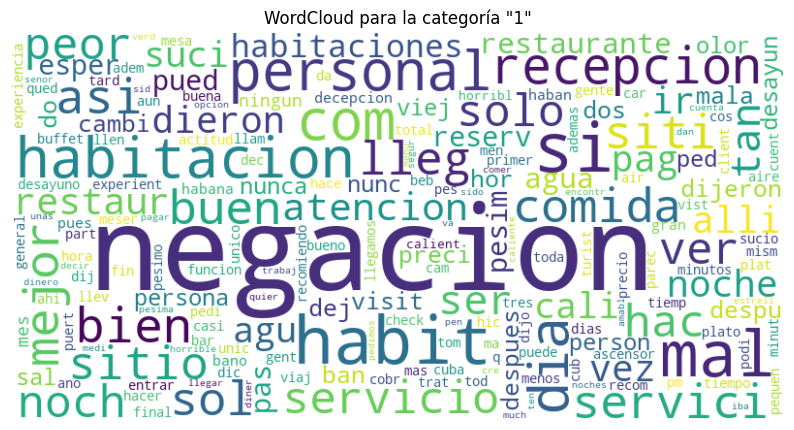

In [28]:
cloud = wordcloud.generate_from_frequencies(word_counts_by_category[1])
plt.figure(figsize=(10, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title('WordCloud para la categoría "1"')
plt.axis('off')
plt.show()



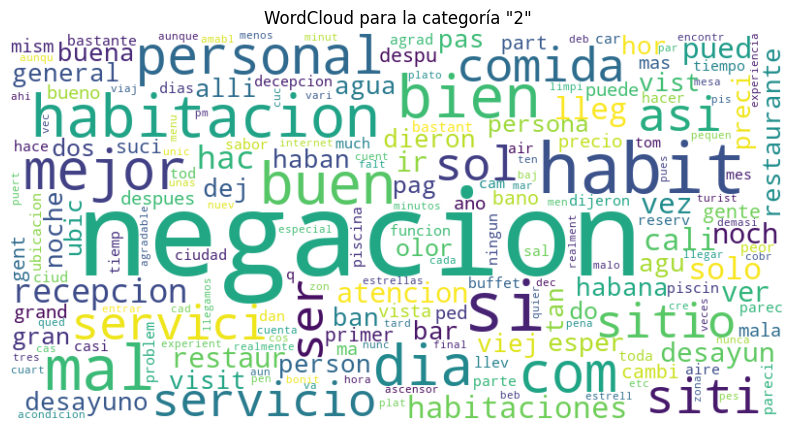

In [29]:
cloud = wordcloud.generate_from_frequencies(word_counts_by_category[2])
plt.figure(figsize=(10, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title('WordCloud para la categoría "2"')
plt.axis('off')
plt.show()


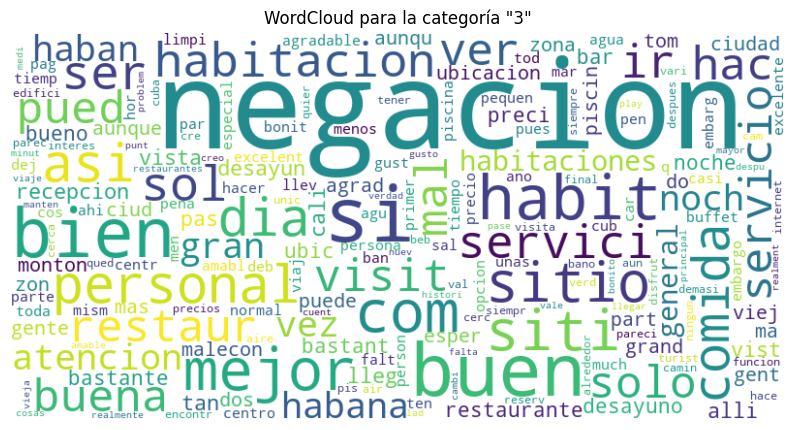

In [30]:
cloud = wordcloud.generate_from_frequencies(word_counts_by_category[3])
plt.figure(figsize=(10, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title('WordCloud para la categoría "3"')
plt.axis('off')
plt.show()

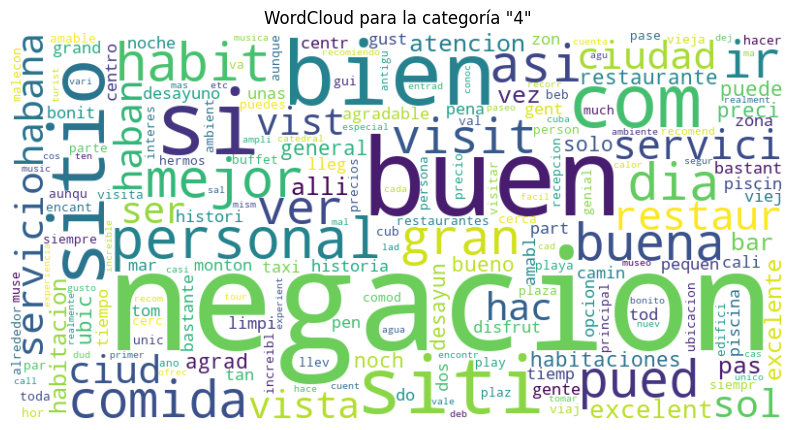

In [31]:
cloud = wordcloud.generate_from_frequencies(word_counts_by_category[4])
plt.figure(figsize=(10, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title('WordCloud para la categoría "4"')
plt.axis('off')
plt.show()


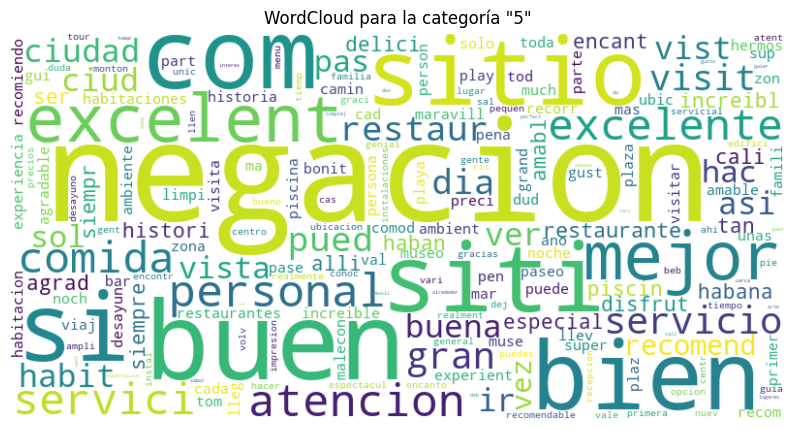

In [32]:
cloud = wordcloud.generate_from_frequencies(word_counts_by_category[5])
plt.figure(figsize=(10, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title('WordCloud para la categoría "5"')
plt.axis('off')
plt.show()

Con ayuda de las frecuencias, podemos evidenciar que en varias clases se repiten algunas palabras. Consideramos que este tipo de ambiguedades son capaces de crear un sesgo a la hora de clasificar porque en mas de una categoria algunas palabras tienen la misma frecuencia y pueden significar que esa palabra esta asociada a mas de una categoria, a pesar de que no sea cierto.

Tras analizar los datos y estas palabras por categoria, nos dimos cuenta que:

# Categoria 1

La categoria 1 es mas enfocada en expresar desagrado extremo, ya sea temas relacionados con asco, sucio, no recomendado, problemas y adjetivos negativos como horrible, desastre. Ademas, es mas propenso a utilizar palabras intensificadoras como Mas, Peor y etc.

# Categoria 2

La categoria 2 es mas enfocada en hablar de quejas enfocadas en el ambiente y quizas algun aspecto rescatable: amabilidad casi nula, humedad, agua sucia, inconformidades con pedidos, comida fria o dura. Ademas, utiliza adjetivos negativos pero no al punto de equipararse con la categoria 1, es decir utiliza palabras mas similares a Malo, mal y raro.

# Categoria 3

La categoria 3 es la mas complicada de perfilar. Recordemos que en este pueden haber tanto aspectos negativos como positivos. Sin embargo, la diferencia mas grande es que posee mas palabras de contraste, tales como Aunque, A pesar, Al menos, Eso si y Pero. Ademas, no posee palabras tan fuertes como Mejor, Peor y asi, sino que se enfoca en terminos mas similares a Regular, No estuvo mal, Agradable, Caro y Normal.

# Categoria 4

La categoria 4 es muy similar a lo que pasa con la categoria 2 y 1, es decir, es muy similar a la categoria 5. Sin embargo, las palabras que mas abundan son positivas pero sin llegar a adjetivos tan exagerados. Es decir, se optan por palabras positivas como Bien, Bueno, Agradable, Buena, Rico, Positivo y Bonito. Ademas, tiene un indice de palabras de contraste mas alto en que en la Categoria 5.

# Categoria 5

La categoria 5 se destaca por utilizar palabras mas creativas relacionada a sentimientos positivos, tales como Excelente, Buenisimo, Precioso, Perfecto, Emocionante, Precioso, Delicioso, Espectacular y Extraordinario. Como podemos ver, es la que mas se aleja al perfil de las categorias porque, segun los datos, las personas mas se enfocan enn los aspectos positivos y dejan casi completamente de lado palabras de contraste como Falta, Aunque y Pero.

Teniendo en cuenta lo anterior, tras un arduo trabajo revisando las palabras, definimos el siguiente conjunto de palabras que NO deberian estar en cada una de las categorias. Ademas, aqui aprovechamos para eliminar algunas palabras sin significado.

In [33]:
palabras_a_eliminar_por_clase = {
  1: ['hermoso', 'herm','hermos','pront','pronto','pron', 'volver','volv', 'vol','volve','alto', 'q', 'unic','fri','zona','iba','pero','do','carr','habana', 'cambi','veces','recom','agrad','cosas','tom','internet','estrellas','problem','tres','siempre','dijo','dic', 'sal','encontr','malo','client', 'sucio','fin','viejo','gente','pedimos','hech','hace', 'quier','viej','vist','vista','amabl','experient','check','ver','señor','tan','día','bien', 'excelente', 'buena', 'mejor', 'si', 'dieron', 'así', 'mal', 'solo', 'pues', 'buen', 'buffet', 'tour', 'aunque','bueno','cuba','decir','despues','además','menos','pesim','normal','alrededor','general','ofrec','ofrece','decepcion', 'turist','turista', 'alrededor','casi','dijeron'],
  2: ['terribl','hoteles','vist','taxi','agua', 'agu','embargo', 'mes','pedimos','acondicion','acondicionado','humedad','embarg','noch','olor','bonit','gust','habana', 'igual','agrad','grand','bastant','mala','recomiendo','especial','pesim','recepcion','bien', 'excelente', 'buena', 'dieron', 'así', 'peor', 'buen', 'mejor', 'solo', 'buffet', 'tour', 'aunque','demasi', 'suci','sucio','pesimo','vista', 'bueno','mas','tan','cuba','tener','realmente','cuban', 'pm','mala','normal','hor','general','ofrec','ofrece','realmente','después','limpio','limpi','ningun','ademas','bueno','actitud','nunc','nunca','mayor'],
  3: ['terribles','terribl','jam','negacion','mojit','interes', 'vista', 'interesante', 'cen','playa','cam','do','monton','sent','lado','grande','gui','pena','montón', 'ciudad', 'problem', 'mayor', 'cuc','tener', 'cuent','amable','famili', 'sabor','dec', 'sitio','pes','pag','función', 'bueno','recom','dej', 'llegar', 'cad', 'cambi', 'allí','baj', 'alli', 'unic', 'cerca','gust','punt','cuba','pod', 'estanci','cub','cerc','quier','ma', 'men','comod','ahi','pase','histori','nuev','historia','cada','medi','mas','mar','ped','beb','precios','grand','segur','ofrec','much','parte','unas','principal','amabl','gust','cer','pues','acondicion','precios','verd','ten','reserv','así','dos','ir','habit','caro','especial','buen', 'buena', 'mejor', 'mala', 'muy', 'bien', 'mal', 'gran', 'cali', 'limpi', 'buffet', 'trat', 'excelent', 'demasiado', 'malecon', 'despues','disfrut','q','demasi','realmente','excelente','bonit', 'bonito','bonita','demasi','experient','dieron'],
  4: ['terribles','siti','terribl','jam','precio','precio','perdi','diner', 'mayor','tenido','perdida', 'dinero','negacion','unas', 'par', 'compr', 'ma', 'muse', 'grand','haban','etc','habit','general','aunqu','tiempo','personal','buffet','bastante','mal', 'mejor', 'peor','agradab', 'agradable', 'excelente', 'excelent', 'solo', 'esper', 'espera', 'esperar', 'aunque','mas','tan', 'realmente', 'increible', 'increi','much','increibl','estrellas','general','agra','ningun','ningun','general','maravill','maravilla','viej','realment','cada','así','encant', 'conoc', 'cub','principal','vieja','calor','hacer','final','hermos','encant','niñ','llen','antigu','hermos','increibl'],
  5: ['volveri','terribles','siti','terribl','jam','lug','falta','precio','precio','perdi','diner', 'mayor','tenido','perdida', 'dinero','otro','gusto','pero','negacion','comod', 'camin','hacer','dentro','malecon','dud','puedes','cada','ambientes','encontr','unas','bonit','bonita','com','personal','recep','recepcion','decente','do', 'agradab', 'agradable','buen', 'buena', 'reserv', 'bien', 'historia', 'solo', 'esper', 'espera', 'esperar', 'instal', 'viej', 'bogot', 'tan', 'dos', 'alli', 'aunque', 'bien', 'bueno','estrellas','general','problema', 'problem','agra','ningun','casi','habana']
}

Posteriormente, revisemos el resultado final al realizar el ultimo perfilamiento en los datos tras toda la preparacion y entendimiento.

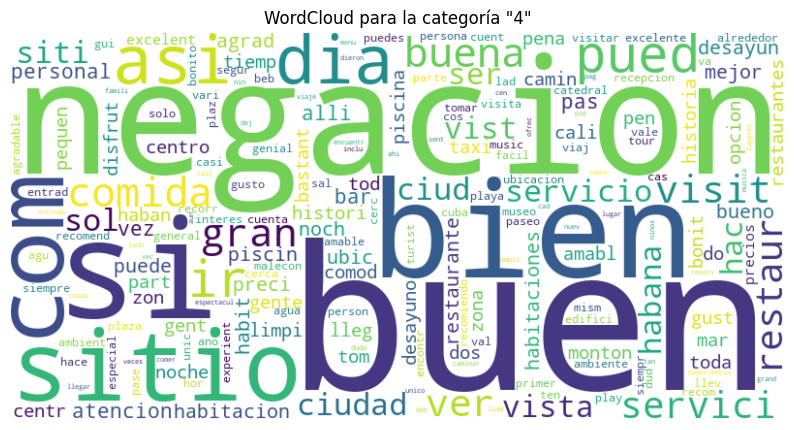

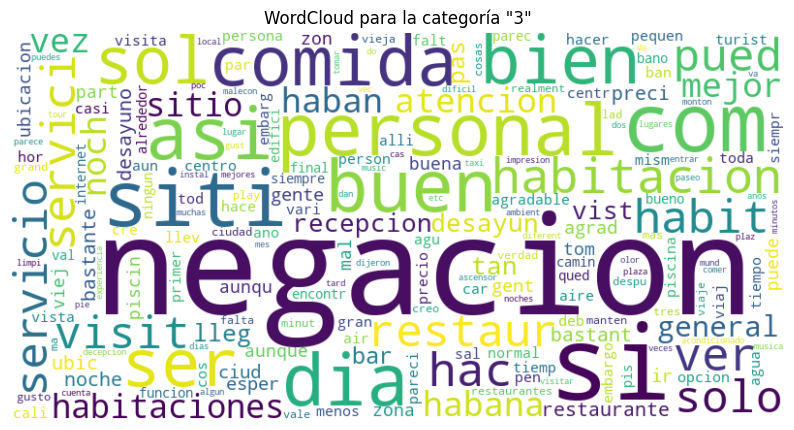

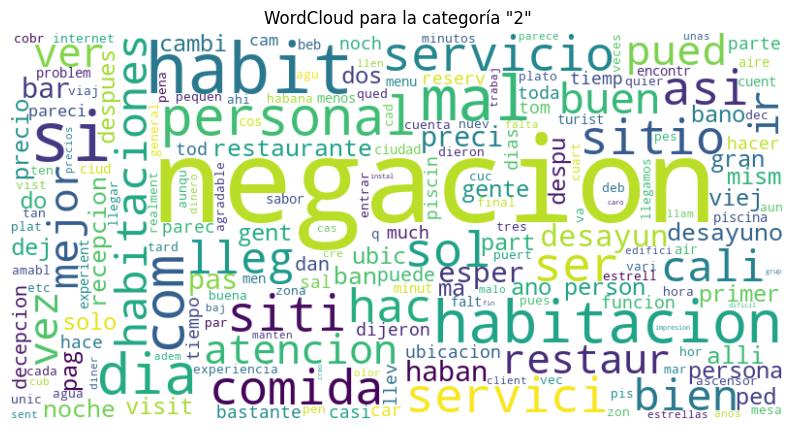

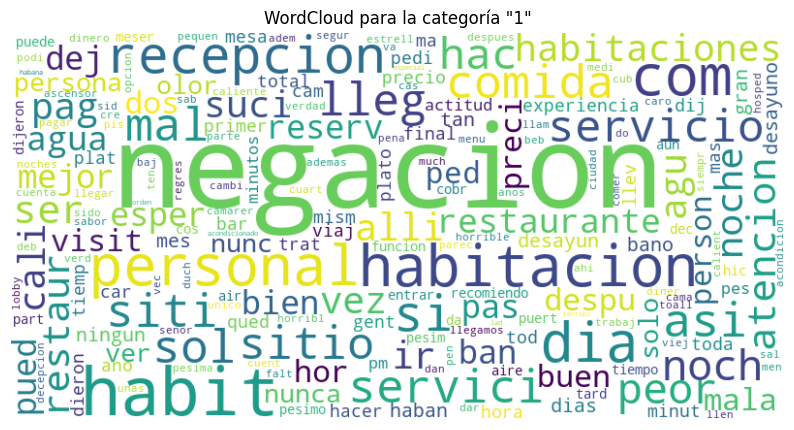

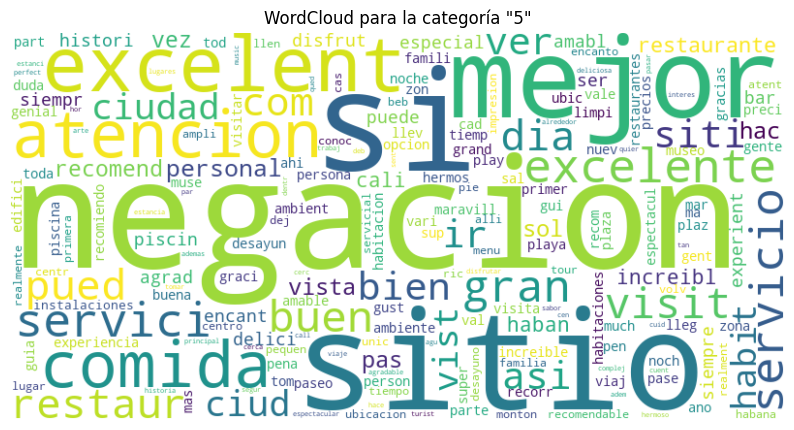

In [34]:
for index, row in data_t.iterrows():
    words = row['words'].split()
    category = row['Class']
    palabras_a_eliminar = palabras_a_eliminar_por_clase.get(category, [])
    words = [word for word in words if word not in palabras_a_eliminar]
    data_t.at[index, 'words'] = ' '.join(words)
    word_counts = defaultdict(int)
    for word in words:
        word_counts[word] += 1
    for word, count in word_counts.items():
        word_counts_by_category[category][word] += count


wordcloud = WordCloud(width=800, height=400, background_color='white')


for category, word_counts in word_counts_by_category.items():
    cloud = wordcloud.generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(f'WordCloud para la categoría "{category}"')
    plt.axis('off')
    plt.show()




##### **3.4 Selección de campos**

Ahora, realizaremos la separacion de datos. Por un lado, estara el texto Words con todas las transformaciones y por otro lado estara la variable objetivo Class, donde el primero seran los textos de entrenamiento y lo segundo seran las etiquetas.

In [35]:
X_data, y_data = data_t['words'],data_t['Class']

X_data

0       cas alquil ciud amurall pareci segur cualqui g...
1       com com mexc unid margarit genial mahi mahi pe...
2       opinion usuari reclam palad parec ser par grup...
3       curios form asemej sill mont ahi nombr icon ci...
4       limon com mund sos fri limonada gusto comida m...
                              ...                        
7870    motiv vin congres medic hosped siti instal ser...
7871    dificil revis castill apen podi camin sofoc ca...
7872    si vas mer pued perdert nuev sucursal ampli mi...
7873    imperd llev nombr conquist joy urbanasu amplit...
7874    festej dia amor amist remont restaur cafeteri ...
Name: words, Length: 7875, dtype: object

# Separacion de conjunto de entrenamiento y conjnuto de pruebas

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_data , y_data, test_size=0.3, random_state=1)

## Entrenamiento y preparacion de los vectorizadores que se van a utilizar.

Para este punto, utilizaremos CountVectorizer para que se cuenten las apariciones por palabra y esa sea la forma de vectorizacion. Posteriormente, se utilizara TfidTransformer para aplicar el concetp de TF-IDF que consiste en tomar en cuenta la aparicion de la palabra tanto en frecuencia como en la importancia de la palabra en el total del texto.



In [37]:


# Entrenamiento de las vectorizaciones a utilizar.
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X_train)
vectorizerT =  TfidfTransformer()
X_train =vectorizerT.fit_transform(X_count)


### Aplicacion de las vectorizaciones en el conjnuto de prueba.

In [38]:

# Ajuste de los elementos de Test para que quede vectorizado igual que los datos de entrenamiento
X_test = vectorizer.transform(X_test)
X_test = vectorizerT.transform(X_test)

In [54]:
X_testM2 = X_test.copy()
X_trainM2 = X_train.copy()
y_testM2 = y_test.copy()-1
y_trainM2 = y_train.copy()-1

# Visualizacion de las palabras en todas las reseñas como resultado de la vectorizacion

En este paso podemos evidenciar el resultado de las vectorizaciones en terminos de frecuencia e importancia. Dado que es complicado revisar minuciosamente los resultado, por esta razon utilizamos WordCloud para que sea mas facil de visualizar.

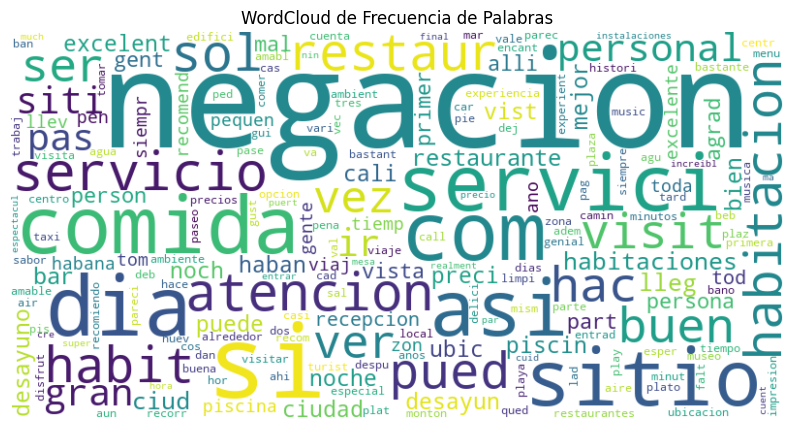

In [40]:

word_frequencies = X_count.sum(axis=0)
palabras = vectorizer.get_feature_names_out()
frecuencias = word_frequencies.tolist()[0]
df_frecuencia = pd.DataFrame({"Palabra": palabras, "Frecuencia": frecuencias})
df_frecuencia = df_frecuencia.sort_values(by="Frecuencia", ascending=False)
word_freq_dict = dict(zip(df_frecuencia['Palabra'], df_frecuencia['Frecuencia']))

wordcloud = WordCloud(width=800, height=400, background_color='white')
cloud = wordcloud.generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title('WordCloud de Frecuencia de Palabras')
plt.axis('off')
plt.show()

Como podemos evidenciar, las palabras mas relacionadas con el lugar, servicio o comida y su calidad es lo que mas aparece; en otras palabras, los adjetivos y los sujetos son las cosas que mas pesan en los textos. Ademas, podemos evidenciar que la palabra No (Cambiada por Negacion para evitar su eliminacion como StopWord) es de las mas recurrentes, es decir, que aparece en gran parte de las reseñas y refleja una alta importancia.

## 4. Creación y Aplicación del modelo
Una vez se tiene la representación vectorial de cada uno de los textos se debe crear un modelo que permita clasificarlos en las categorias correspondientes. Para esto se pueden usar cualquiera de las representaciones anteriormente creadas.



# Modelo de SVC

Este es un algoritmo de aprendizaje supervisado en el cual se busca crear un hiperplano que sea el encargado de separar por una linea los datos que sean de un tipo u otro.  El entrenamiento consiste en lograr diferenciar los datos de cada categoria trazando un hiperplano que separe equitativamente los datos de cada categoria; mas especificamente, la distancia entre los puntos mas cercanos de una categoria y el hiperplano sera maxima. Lo importante de este modelo es que una vez se define el hiperplano optimo que separe las categorias, identificar la categoria de un nuevo dato resulta evidente al ver en que parte quedo ubicado.
En terminos de hiperparametros, en los casos donde la linea siempre queda encima de algun dato, causando una ambiguedad durante el entrenamiento, es posible ajustar un parametro C que se encargara de definir que tantos errores puede permitirse, valores mas altos de C hace que sea mas propenso a permitir errores, mientras que menores que 1 hace que la tolerancia a errores se haga menor. Ademas, tambien se puede elegir el Kernel a utilizar.
Para este caso, optamos por utilizar un Kernel lineal por la naturaleza de los datos y un C igual a 1.


In [41]:
# Definir el clasificador SVM
svm_classifier = SVC(kernel='linear',C=1)  # Puedes ajustar el tipo de kernel y otros parámetros según lo desees


svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)


# Metricas de Calidad de SVC.

Como podemos evidenciar, se presenta un Accuracy del 88.44% lo cual indica un buen desempeño del modelo. El recall, precision y f1-Score presentan indices altos, lo cual quiere decir que el modelo si esta clasificando correctamente las categorias.

Mas especificamente, podemos evidenciar que es altamente preciso para la mayoria de Categorias, siendo la categoria 1 y 2 aquellas con el menor recall, lo cual indica que el modelo tiende a clasificar menos instancias de estas categorías correctamente en comparación con las demás. Sin embargo, aún así, la precisión y el f1-score para estas categorías son bastante altos, lo que sugiere que, aunque el modelo puede perder algunas instancias de estas categorías, cuando clasifica una instancia como perteneciente a estas categorías, suele ser correcto.

En resumen, el modelo SVM parece funcionar bien en general, con un alto nivel de precisión en la mayoría de las categorías. Sin embargo, podrían necesitarse ajustes adicionales para mejorar el rendimiento en las categorías con menor recall, como las categorías 1 y 2. Esto podría incluir técnicas como el ajuste de parámetros del modelo SVM, la selección de características más relevantes o el aumento del conjunto de datos con más ejemplos de estas categorías.


In [42]:

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy)

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Precisión del modelo SVM: 0.8844688954718578
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.94      0.78      0.85       246
           2       0.90      0.85      0.88       335
           3       0.86      0.95      0.90       456
           4       0.88      0.85      0.87       590
           5       0.88      0.92      0.90       736

    accuracy                           0.88      2363
   macro avg       0.89      0.87      0.88      2363
weighted avg       0.89      0.88      0.88      2363



### Matriz de confusion graficamente.

## Categoria 5
Podemos evidenciar que el modelo tiende a confundir las reseñas de categoria 5 con las categorias 4 y 3, lo cual, si bien no es adecuado, es valido porque permite ver que en el peor de los casos una excelente reseña no sera contada como negativa, y, de hecho, en la mayoria de los casos, solo se categorizara como positiva pero en categoria 4.

## Categoria 4
Aqui podemos evidenciar que la categoria 4 solo es confundida por una categoria 5 y 3. Lo cual es aceptable para el negocio porque no se esta confundiendo con algo negativo, es decir lo positivo sigue manteniendose positivo. Ademas, que se confunda con categoria 3 no es tan descabellado teniendo en cuenta que la categoria 4 ocurre cuando hay algunas pocas inconformidades.

## Categoria 3

En esta categoria, podemos evidenciar un problema regular. La categoria 3 es confundida con 5, lo cual es un error porque 5 implica algo buenisimo, mientras que 3 implica que hay varias inconformidades. Sin embargo, las confunsiones son pocas y pueden no significar un problema la mayoria de las veces.

## Categoria 2 y 1

Estas categorias presentan problemas porque se estan confundiendo con categorias que representan lo opuesto, como lo son la 5 y 4. Si bien no son muchos datos, esto implica que va a haber un sesgo entre la clasificacion de estas clases.

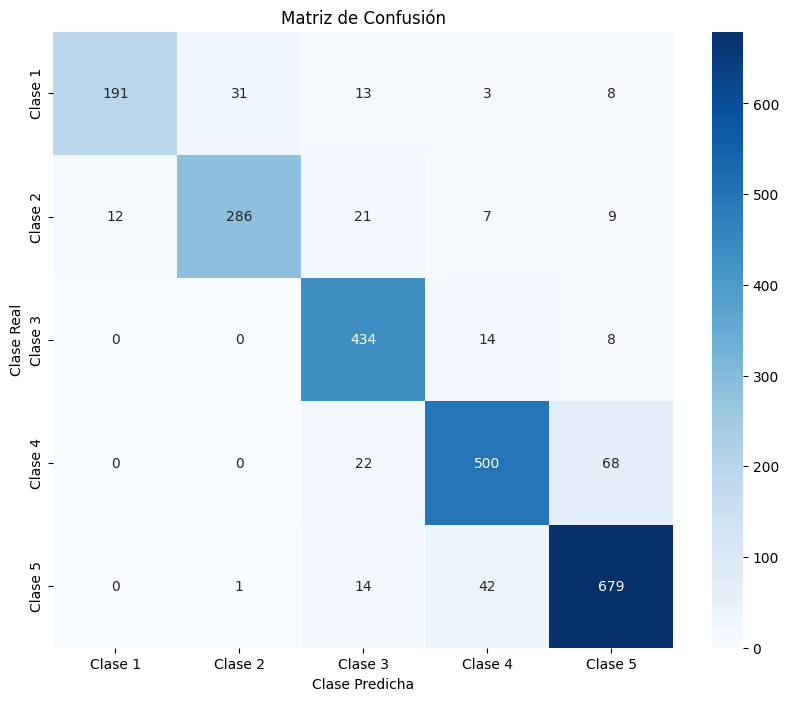

In [43]:
classes = ['Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5']
conf_matrix = confusion_matrix(y_test, y_pred)
# Crear heatmap de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

En conclusion, SVC sera un modelo buenisimo para identificar reseñas positivas pero no no tiene un muy buen desempeño para las criticas negativas, realizando cosas absurdas en terminos de negocio.


## Regresion Logistica

La regresión logística es un método utilizado para predecir la probabilidad de que una instancia pertenezca a una de dos o más clases. Funciona modelando esta probabilidad utilizando una función sigmoide, que mapea cualquier valor real en un rango entre 0 y 1.
Durante el entrenamiento, el algoritmo ajusta sus parámetros para maximizar la probabilidad de observar los datos de entrenamiento dados esos parámetros. En otras palabras, trata de encontrar la función logística que mejor se ajuste a los datos y que pueda separar eficazmente las diferentes clases. Una vez que el modelo está entrenado, puede usarse para predecir la clase de nuevas instancias calculando la probabilidad de pertenencia a cada clase y eligiendo la clase con la probabilidad más alta. Este enfoque probabilístico permite interpretar las predicciones del modelo en términos de probabilidades, lo que proporciona una mayor comprensión de la incertidumbre asociada con cada predicción.



In [44]:

# Definir el clasificador de regresión logística con hiperparámetros especificados
logistic_regression = LogisticRegression(max_iter=20000)

# Entrenar el modelo de regresión logística
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)


## Metricas de Calidad

Como podemos observar, el modelo de regresión logística presenta una precisión del 87.05%, lo que indica un buen desempeño en general. Los valores de recall, precisión y f1-score son bastante altos, lo que sugiere que el modelo está clasificando correctamente la mayoría de las categorías.

Específicamente, podemos notar que el modelo es altamente preciso para la mayoría de las categorías, con las categorías 1 y 2 mostrando el menor recall. Esto indica que el modelo tiende a clasificar menos instancias de estas categorías correctamente en comparación con las demás. Sin embargo, la precisión y el f1-score para estas categorías son aún altos, lo que sugiere que, aunque el modelo puede perder algunas instancias de estas categorías, cuando clasifica una instancia como perteneciente a estas categorías, suele ser correcto.

En resumen, el modelo de regresión logística parece funcionar bien en general, con un alto nivel de precisión en la mayoría de las categorías. Sin embargo, podrían ser necesarios ajustes adicionales para mejorar el rendimiento en las categorías con menor recall, como las categorías 1 y 2. Esto podría incluir técnicas como el ajuste de parámetros del modelo de regresión logística, la selección de características más relevantes o el aumento del conjunto de datos con más ejemplos de estas categorías.



In [45]:

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)



# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)


Precisión del modelo de regresión logística: 0.8705035971223022
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.95      0.68      0.79       246
           2       0.86      0.83      0.84       335
           3       0.86      0.94      0.90       456
           4       0.91      0.83      0.87       590
           5       0.84      0.94      0.89       736

    accuracy                           0.87      2363
   macro avg       0.88      0.84      0.86      2363
weighted avg       0.88      0.87      0.87      2363



### Categoría 5

Se puede notar que el modelo tiende a confundir las reseñas de la categoría 5 con las categorías 4 y 3. Aunque esta situación no es óptima, resulta aceptable, ya que implica que incluso en el peor de los casos, una reseña excelente no será clasificada como negativa. En la mayoría de las instancias, estas reseñas se clasificarán como positivas, pero en la categoría 4.

### Categoría 4

Aquí se observa que la categoría 4 solo se confunde con las categorías 5 y 3. Este comportamiento es aceptable para el negocio, ya que no implica confundir lo positivo con lo negativo. Además, que se confunda con la categoría 3 no es demasiado problemático, considerando que la categoría 4 se asigna cuando hay algunas pocas inconformidades.

### Categoría 3

En esta categoría, se evidencia un problema moderado. La categoría 3 se confunde con la categoría 5, lo cual es un error, ya que la categoría 5 implica algo excelente, mientras que la categoría 3 indica que hay varias inconformidades. Sin embargo, las confusiones son escasas y probablemente no representen un problema la mayoría de las veces.

### Categoría 2 y 1

Estas categorías presentan problemas, ya que se confunden con categorías que representan lo opuesto, como la 5 y la 4. Aunque no son numerosos los datos, esto implica que habrá un sesgo en la clasificación de estas clases.



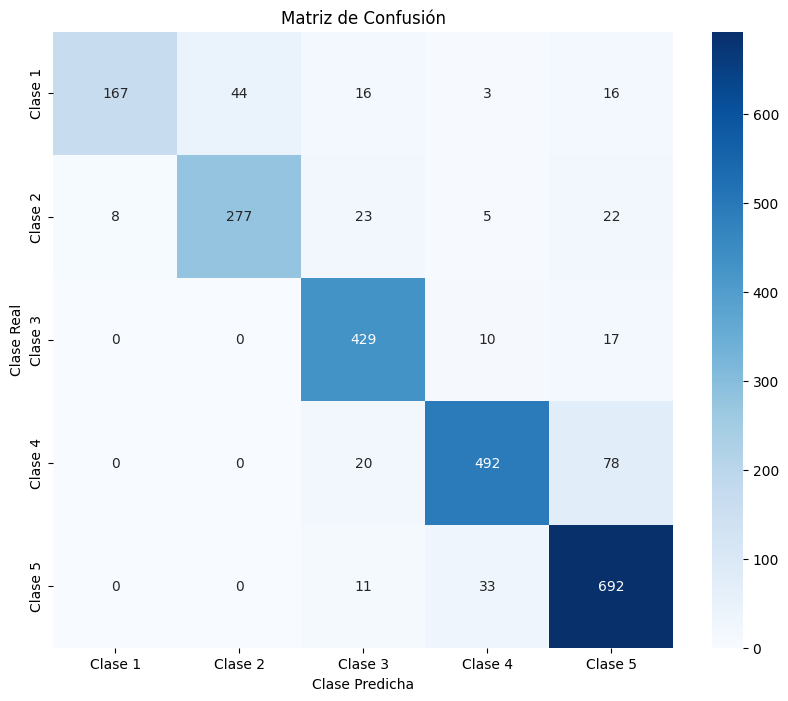

In [46]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
# Definir etiquetas de las clases
classes = ['Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5']

# Crear heatmap de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Pruebas y utilizacion del modelo.



In [47]:
def preprocesamiento(dataframe):

  dataframe['Review'] = dataframe['Review'].apply(limpiar_texto)
  dataframe['Review'] = dataframe['Review'].apply(expandir_contracciones)
  dataframe['Review'] = dataframe['Review'].apply(eliminar_stopwords)
  dataframe['Review'] = dataframe['Review'].apply(filter_substrings)
  dataframe['Review'] = dataframe['Review'].apply(remove_non_ascii)
  dataframe['words'] = dataframe['Review'].apply(tokenize_spanish)
  dataframe['words'].dropna()
  dataframe['words'] = dataframe['words'].apply(stem_and_lemmatize)
  dataframe['words'] = dataframe['words'].apply(lambda x: ' '.join(map(str, x)))


In [48]:

"""
# Lee el DataFrame inicial
dataEntrega = pd.read_csv('particion_prueba_estudiantes.csv', sep=',', encoding='utf-8')
preprocesamiento(dataEntrega)

# Aplica la transformación necesaria para los datos de entrada
X_entrega = dataEntrega['words']
X_entrega_replaced = X_entrega.apply(lambda x: ' '.join(word if word in vectorizer.vocabulary_ else '' for word in x.split()))
X_entrega = vectorizer.transform(X_entrega_replaced)
X_entrega = vectorizerT.transform(X_entrega)


y_entrega = svm_classifier.predict(X_entrega)


dataEntrega['Class'] = y_entrega

# Guarda el DataFrame actualizado con las predicciones
dataEntrega.to_csv('particion_prueba_estudiantes.csv', index=False)"""



"\n# Lee el DataFrame inicial\ndataEntrega = pd.read_csv('particion_prueba_estudiantes.csv', sep=',', encoding='utf-8')\npreprocesamiento(dataEntrega)\n\n# Aplica la transformación necesaria para los datos de entrada\nX_entrega = dataEntrega['words']\nX_entrega_replaced = X_entrega.apply(lambda x: ' '.join(word if word in vectorizer.vocabulary_ else '' for word in x.split()))\nX_entrega = vectorizer.transform(X_entrega_replaced)\nX_entrega = vectorizerT.transform(X_entrega)\n\n\ny_entrega = svm_classifier.predict(X_entrega)\n\n\ndataEntrega['Class'] = y_entrega\n\n# Guarda el DataFrame actualizado con las predicciones\ndataEntrega.to_csv('particion_prueba_estudiantes.csv', index=False)"

In [49]:
"""dataEntrega[['Review', 'Class']]"""

"dataEntrega[['Review', 'Class']]"

## Pon a prueba tu mismo

In [50]:


def pruebaloTu(text):
  prueba = pd.DataFrame({'Review':[text]})
  preprocesamiento(prueba)
  X_final = prueba['words']
  X_final_replaced = X_final.apply(lambda x: ' '.join(word if word in vectorizer.vocabulary_ else '' for word in x.split()))
  X_final = vectorizer.transform(X_final_replaced)
  X_final= vectorizerT.transform(X_final)
  y_final = svm_classifier.predict(X_final)
  return "Las estrellas que le quieres dar es: " + str(y_final[0])

# Escribe una reseña que tengas y el modelo intentara predecir.

In [51]:
texto = input("Escribe un texto para probar: ")
pruebaloTu(texto)

'Las estrellas que le quieres dar es: 5'

#Modelo de secuencia: 2 LSTM y dos capas densas. Relu y softmax respectivaente.

Una LSTM sirve para capturar dependencias a largo plazo en secuencias de datos, permitiendo modelar desde series temporales incluyendo lenguaje natural. Tiene un diseño con puertas de olvido, entrada y salida, puede recordar información por periodos largos y decidir qué datos son relevantes para retener o descartar a lo largo del tiempo. Este mecanismo la hace funcional para casos como estos, donde la secuencia y el contexto de los datos importan, es decir, el contexto de las palabras dentro de una review es valioso incluso mas adelante dentro de la misma review.

Una LSTM bidireccional toma la estructura base de una LSTM y la extiende para procesar la información en dos direcciones: hacia adelante y hacia atrás. Esto le permite tener en cuenta no solo la información previa sino también la posterior al punto de interés en la secuencia. Al integrar los resultados de ambas direcciones, ofrece una comprensión más completa del contexto. Por eso hemos decidido usar lstms bidireccionales. La primera devuelve secuencias para que sean el input de la segunda lstm. Finalmente esa ultima lstm le pasa su resultado a una red neuronal de dos capas. La primera capa tiene activacion relu y la segunda softmax. La segunda capa tiene que ser de 5 neuronas porque cada una clasifica la probabilidad que el review pertenezca a una clase. Al final, escogemos la clase que tenga la probabilidad mas alta.
Tener en cuenta que para este modelo usamos la preparacion de datos solo hasta la parte donde se tokeniza con spacy y se obtinene los ebeddings de esos toekns y se agrega padding. Estio se hace porque las lstm requieren una entrada secuencial.

In [52]:
primer_embedding_con_padding = data_ta['embeddings_con_padding'].iloc[0]
print("Shape de una fila de embeddings con padding:", np.shape(primer_embedding_con_padding))
tam_emb = np.shape(primer_embedding_con_padding)[1]


import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, BatchNormalization, Dense

from tensorflow.keras.metrics import Precision, Recall

#  convertir a un array de NumPy
X = np.array(data_ta['embeddings_con_padding'].tolist())


yPrev = data_ta['Class'].astype('int')


model = Sequential()
# Primera capa LSTM bidireccional
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(longitud_maxima_secuencia, tam_emb)))
model.add(Dropout(0.5))
model.add(BatchNormalization())  # Agregar normalización por lotes después de LSTM

# Segunda capa LSTM bidireccional
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dropout(0.5))
model.add(BatchNormalization())


model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))  # Capa de salida para 5 clases de satisfacción


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

# Entrenar el modelo


y = yPrev - 1

# Dividir los datos
X_trainM1, X_valM1, y_trainM1, y_valM1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con las etiquetas ajustadas
history = model.fit(X_trainM1, y_trainM1, validation_data=(X_valM1, y_valM1), epochs=60, batch_size=128)


Shape de una fila de embeddings con padding: (168, 300)


C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 168, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 168, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 168, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,053 (898.64 KB)

 Trainable params: 229,637 (897.02 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.2202 - loss: 2.1911 - val_accuracy: 0.3340 - val_loss: 1.5289
Epoch 2/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.2634 - loss: 1.8678 - val_accuracy: 0.3578 - val_loss: 1.4468
Epoch 3/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.3006 - loss: 1.6993 - val_accuracy: 0.3862 - val_loss: 1.3605
Epoch 4/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.3429 - loss: 1.5682 - val_accuracy: 0.3664 - val_loss: 1.4696
Epoch 5/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.3546 - loss: 1.4955 - val_accuracy: 0.4266 - val_loss: 1.3013
Epoch 6/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.3843 - loss: 1.3958 - val_accuracy: 0.4444 - val_loss: 1.2575
Epoch 7/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.3886 - loss: 1.3769 - val_accuracy: 0.4603 - val_loss: 1.2490
Epoch 8/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.4177 - loss: 1.2916 - val_accuracy: 0

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Accuracy: 0.4537037037037037
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.40      0.65      0.50       232
           2       0.41      0.45      0.43       303
           3       0.39      0.49      0.43       383
           4       0.67      0.47      0.55       451

    accuracy                           0.45      1512
   macro avg       0.37      0.41      0.38      1512
weighted avg       0.44      0.45      0.44      1512



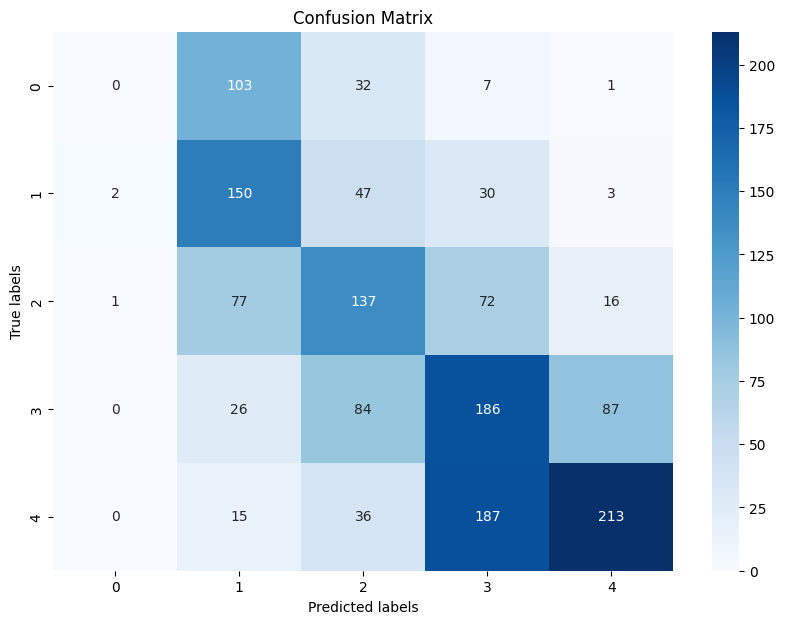

In [53]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Hacer predicciones
predictions = model.predict(X_valM1)
# Convertir las predicciones de probabilidades a etiquetas finales
predicted_classes = np.argmax(predictions, axis=1)


# Calcular la precisión del modelo
accuracy = accuracy_score(y_valM1, predicted_classes)
print(f'Accuracy: {accuracy}')

# Imprimir el reporte de clasificación
print('Classification Report:')
print(classification_report(y_valM1, predicted_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_valM1, predicted_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Los resultados muestran un Accuracy de 45.37%, lo cual indica un rendimiento moderado del modelo. La precisión, recall y f1-Score varían significativamente entre las categorías. La categoría 1 tiene una precisión de 0.40 y un recall de 0.65, lo que resulta en un f1-Score de 0.50, indicando que mientras el modelo es relativamente conservador al predecir esta categoría (con más falsos negativos que positivos), cuando lo hace, suele ser correcto. Por otro lado, la categoría 0 muestra resultados bajos en todas las métricas, con una precisión y recall de 0.0, y un f1-Score de 0.0, lo que podría sugerir que el modelo tiene dificultades para identificar correctamente las instancias de esta categoría. De otra forma, podria estar sucediendo un error en la preparacion de los datos. Esto es porque para el modelo tocaba dejar todas las clases de 0 a 4 en vez de 1 a 5.

La categoría 2 tiene una precisión de 0.41 y un recall de 0.45, con un f1-Score de 0.43, mostrando un rendimiento equilibrado en términos de precisión y sensibilidad. Las categorías 3 y 4 tienen una precisión de 0.39 y 0.67, respectivamente, y ambas tienen un recall cercano al 0.47, con f1-Scores de 0.43 y 0.55. Esto sugiere que el modelo es bastante bueno al clasificar la categoría 4, pero no tan bueno con la 3.


En cuanto a la matriz de confusion, podemos ver que hay graves errores en la mayoria de clases. Podemos ver que la clase 0 tiene muy pocas predicciones y pocos valores de verdad. Sospechamos que es por el corrimientoq ue se tuvo que hacer para que la funciondeperdida funcionara. Adicionalmente, para el resto de clases, se puede ver que tienen una fuere confusion, donde las predichas tienden a equivocarse por 1 estrella. Es decir, si se predice la clase 3, pasa que los valores de verdad pueden ser o 1 estrella mas arriba o mas abajo. El error mas fuerte de esos esta en la clase 3, es decir, lo que corresponde a 4 estrellas.  Pasa que se predice que va a tener 4 estrellas pero un gran porcentaje de esas veces, el valor de verdad es la clase 4 o 5 estrellas.


#Modelo de redes neuronales simples

primero limpiamos la memoria del modeo anterior para no tener problemas de memoria

In [55]:
import gc

del model
gc.collect()  


7437

In [56]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam  # Si estás utilizando una versión de TensorFlow anterior, esta línea podría no ser necesaria ya que `optimizer='adam'` puede ser suficiente.


# Definir la arquitectura del modelo
model = Sequential()


print(y_trainM2.value_counts())

# Sigue el resto del modelo
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.99))
model.add(BatchNormalization())

model.add(Dense(400, activation='relu'))

model.add(Dense(5, activation='softmax'))  

learning_rate = 0.08 
optimizer = Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


model.summary()

# Entrenar el modelo



import matplotlib.pyplot as plt


history = model.fit(X_trainM2, y_trainM2,
          validation_data=(X_testM2, y_testM2),
          epochs=580,
          batch_size=4096     )




Class
4    1614
3    1381
2    1112
1     838
0     567
Name: count, dtype: int64


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2273 - loss: 1.8853 - val_accuracy: 0.2497 - val_loss: 1.5992
Epoch 2/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2674 - loss: 1.7164 - val_accuracy: 0.2497 - val_loss: 1.5897
Epoch 3/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2893 - loss: 1.6753 - val_accuracy: 0.2505 - val_loss: 1.5826
Epoch 4/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3202 - loss: 1.6045 - val_accuracy: 0.3352 - val_loss: 1.5805
Epoch 5/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3349 - loss: 1.5563 - val_accuracy: 0.4748 - val_loss: 1.5824
Epoch 6/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3627 - loss: 1.4984 - val_accuracy: 0.5222 - val_loss: 1.5863
Epoch 7/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3773 - loss: 1.4620 - val_accuracy: 0.6382 - val_loss: 1.5882
Epoch 8/580
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3857 - loss: 1.4369 - val_accuracy: 0.6496 - val_loss: 1.5861
Epoch 9/

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.8552687261955142
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78       246
           1       0.82      0.84      0.83       335
           2       0.87      0.91      0.89       456
           3       0.85      0.83      0.84       590
           4       0.84      0.91      0.88       736

    accuracy                           0.86      2363
   macro avg       0.87      0.83      0.84      2363
weighted avg       0.86      0.86      0.85      2363



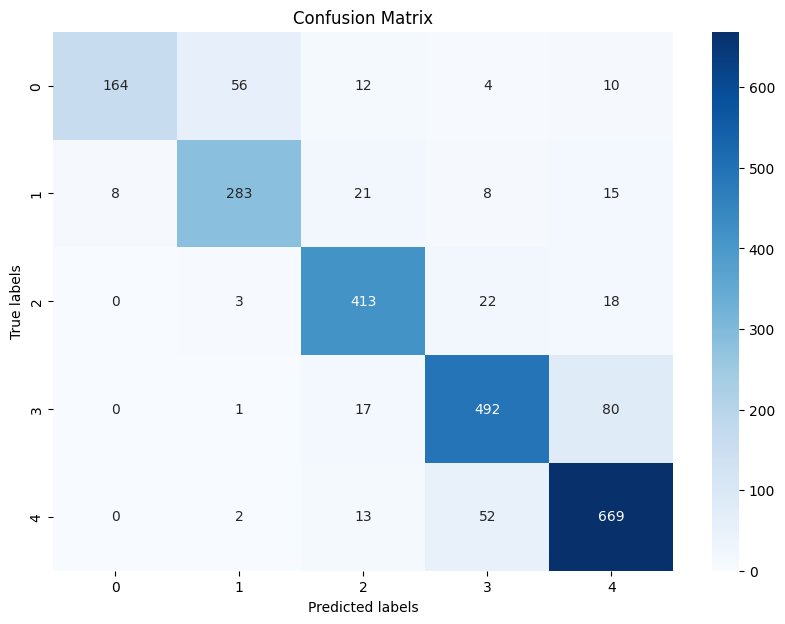

In [57]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Hacer predicciones
predictions = model.predict(X_testM2)
# Convertir las predicciones de probabilidades a etiquetas finales
predicted_classes = np.argmax(predictions, axis=1)


# Calcular la precisión del modelo
accuracy = accuracy_score(y_testM2, predicted_classes)
print(f'Accuracy: {accuracy}')

# Imprimir el reporte de clasificación
print('Classification Report:')
print(classification_report(y_testM2, predicted_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_testM2, predicted_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Este fue uno de los mejores modeos que obtuvimos con redes neuronales. Me explico, nosotros realizamos experimentos con diferentes arquitecturas, probando diferente numeo de neuronas y diferente numero de capas asi como cambiando el dropout. El dropout se usa para tener un efecto regularizador. Pusimos sus valroes asi de altos para evitar el sobreajuste, ya que era muy facil que el modelo sobreajustara, más aun con la cantidad tan alta que entrenamos de neuronas en la primera capa. Fueron 2500 en la primera capa. Los resultados indican un rendimiento muy bueno. Podemos notar, a difernecia del modelo de las LSTM, que  clase 0 tuvo metricas altas (excepto el recall que que tuvo su valor masbajo para la clase 0 de 67%). Ese recall indica que el modelo identifica las instancias relevantes con algo de precision. Por otra parte. notamos que la mejor clase predica fue la clase 2, donde el f1 socre tuvo un performance del 89%. Esto se puede notar facilmente en la matriz de confusion.

Clase 0:
 de los 172 datos que se predijeron para la clase 0, 164 fueron verdad. podemos decir que en general, cuando se predice la clase 0 suele ser verdad, pero no todas las clases 0 se predicen correctamente siempre. Esto porque hubo82 instancias de la clase 0 que no se lograron identificar como clase0.

 Clase1:
 El punto relevante aqui es que hubo un problema al predecir la clase 1. Una parte de las veces pasa que cuando se predice la clase 1 en realidad los datos verdaderos corresponden a la clase 0 o lo que es lo mismo 1 estrella.
 Clase 2:
  la clase 2  es de las mejores clases para el modeo. Su mayor falla es que a veces cuando predice la clase 2 en realidad corresponde la verdad a otras clases. No siempre las cercanas, ese error se distrbuye en todas las otras clases casi por igual, un poquito mas alto para las clases 1 y 3.

  Clase 3: 
   El modeo falla casi un 10% de las veces que predice la clase 3. Suele pasar que cuando se predicen 4 estrellas los valroes de verdad corr4esponden a 5 entrells. Tambien pasa que no todos los valres de la clase 3 son efectivamente la clase 3, muchas veces se predicen mal como si fuesen la clas 4.

   Clase 4:
   En cuanto a la clase 4, una parte importante de los valroes de clase 4 se predicen erroneamente como clase 3. O sea, las reviews de 5 estrellas a veces se rpedicen como de 4 estrellas. Finalmente,  esta es la clase que el modelo predijo mas veces asertadamente, en parte porque hat mas datos para esta clase.




Estas fueron algunas otras redes que probamos
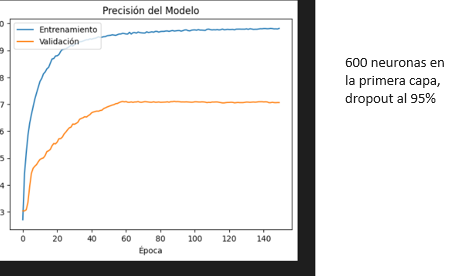
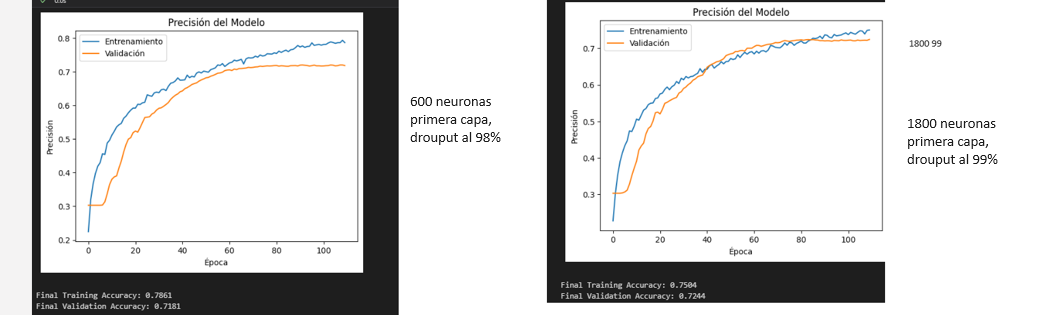
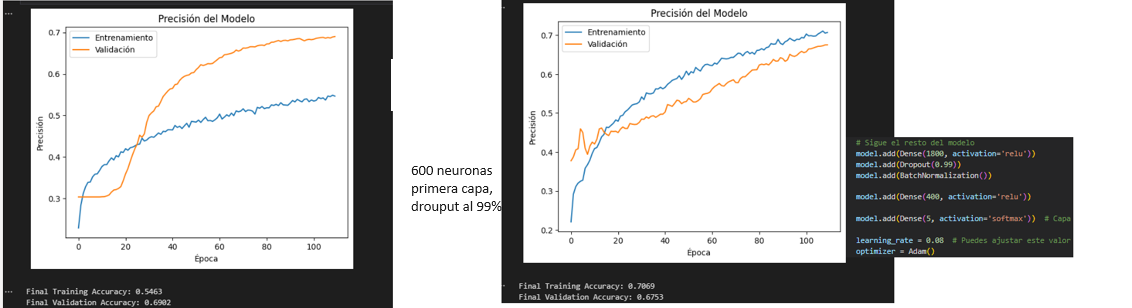

#Modelo de GPT2



Se obtuvo de la libreria transformers de hugging face el tokenizador de gpt2 y el modelo de GPT2forSequenceClassification, que es un modelo preentrenado de gpt2.
Este modelo se trabajó en torch por lo que fue bastante diferente (al momento del entrenamiento, torch se programa más detalladamente que tensoflow, y nos permitió usar la GPU con CUDA porque TF no dejaba). La estrategia fue pasarle informacion previamente preparada con el mismo proceso que se preparo la informacion de las LSTM. Se tokenizaban y ese mismo tokenizador asigna un padding a los tokens para que todas las secuencias tengan la misma longitud. Un punto importante tanto en el modelo de las LSTM como en este es que las secuencias con una longitud outlier se descartaban. Fueron pocas secuencias en relacion al total de datos que se contaba las que tuvieron que ser descartadas. Ademas, los datos resultantes tenian como longitud maxima 89. Es decir, teniendo en cuenta que los outliers tenian longitudes de 900, podemos decir que los datos resultantes parecen ser de buena calidad. Esto es importante porque se requiere memoria al momento de hacer todas las cadenas de la misma longitud con padding. Si nuestra cadena mas larga, no es tan larga, eso hace que la demanda de recursos de memoria sea mucho menor. 
De este modelo probamos dos arquitecturas. La primera era entrenar todo el modelo con la información de los reviews arreglada por 50 etapas. La segunda arquitectura fue crear una clase que herede el modelo principal pero agregándole capas nuevas y congelando todas menos la última del modelo de gpt2. La nueva capa era de 600 uniadades. Finalmente una capa densa de 5 unidades con softmax para clasificación. Cada capa usaba relu y dropout al 50%. Ninguno de estos modelos funcinófuncionó correctamente. Pudimos ver que el modelo siempre estaba prediciendo la clase 5, nunca predijo un valor que correspondiera de 1 a 4. 
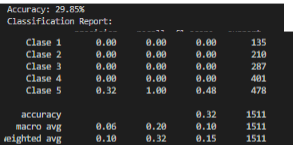


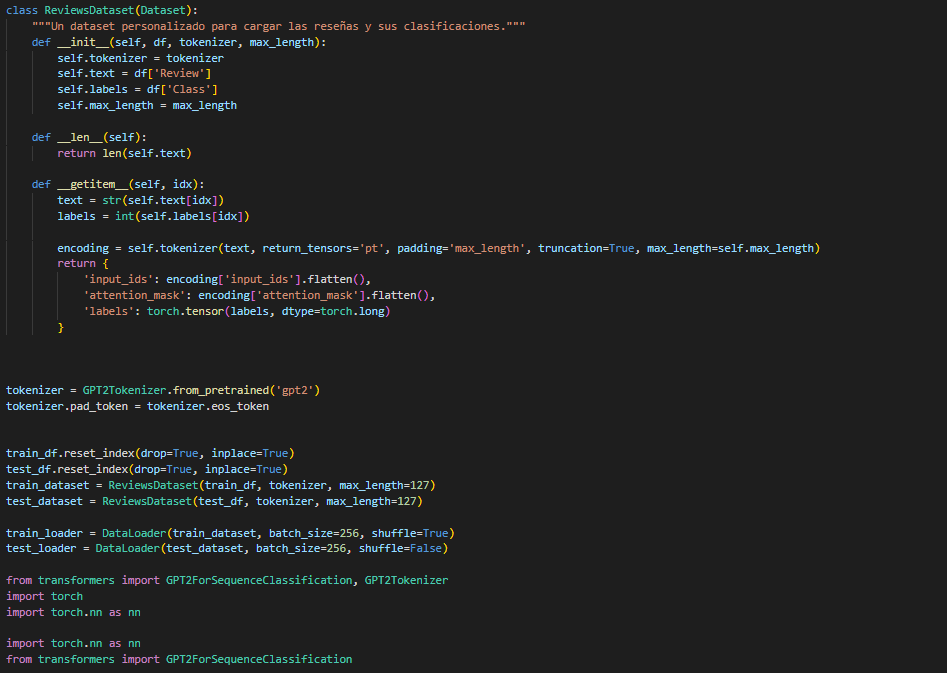
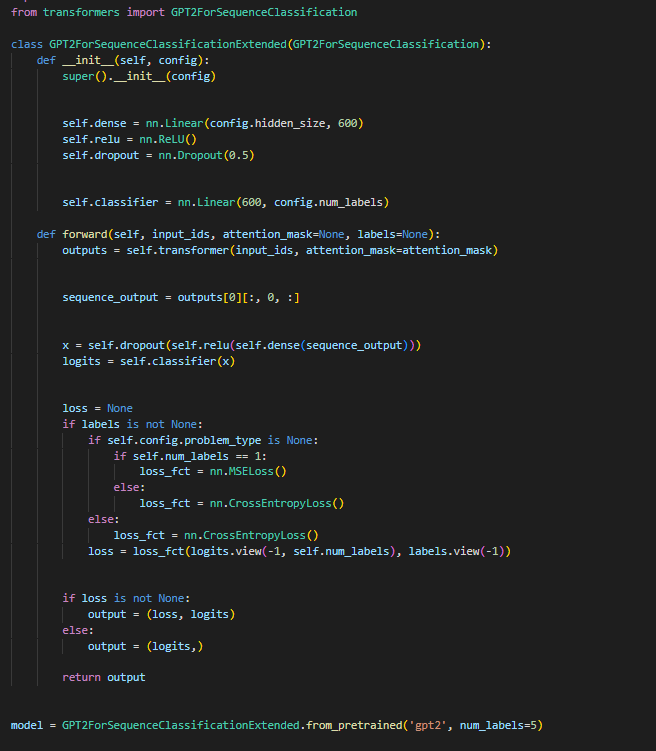
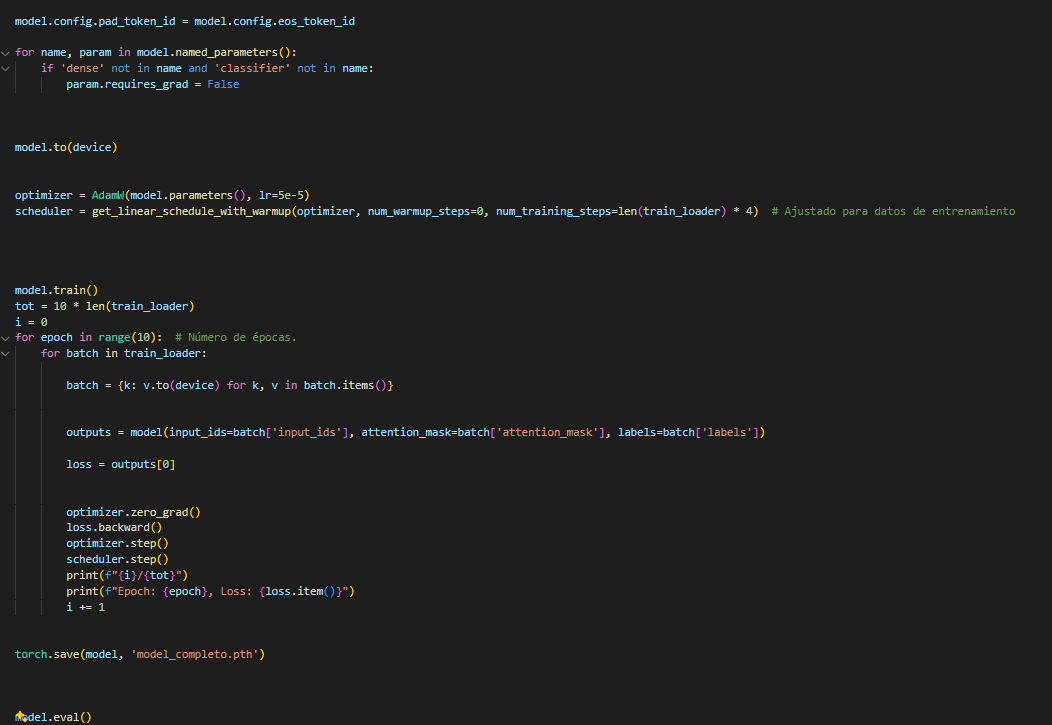
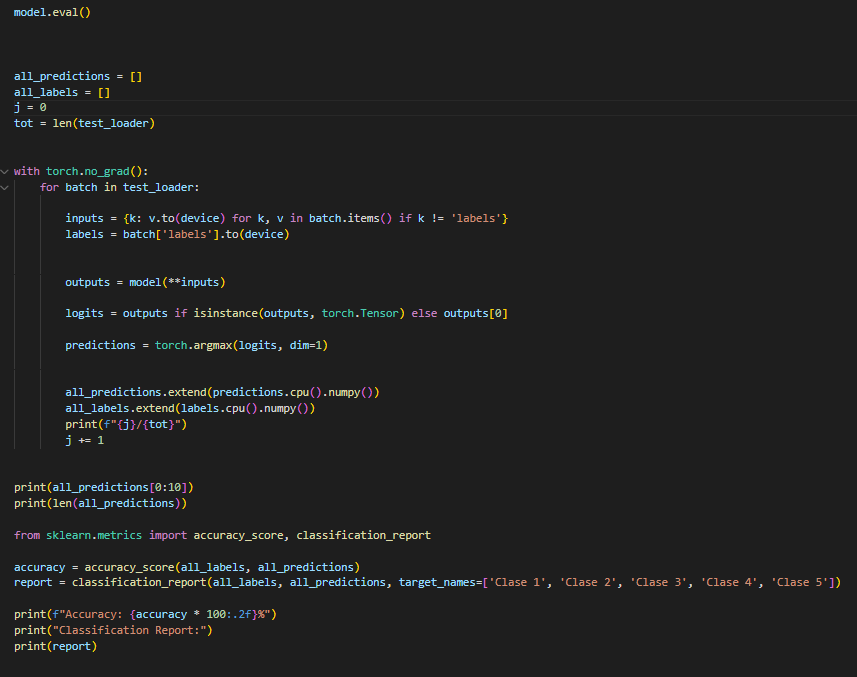

Prediccion con el mejor modelo de redes neuronales

In [58]:
def preprocesamiento2(dataframe):

  dataframe['Review'] = dataframe['Review'].apply(limpiar_texto)
  dataframe['Review'] = dataframe['Review'].apply(expandir_contracciones)
  dataframe['Review'] = dataframe['Review'].apply(eliminar_stopwords)
  dataframe['Review'] = dataframe['Review'].apply(filter_substrings)
  dataframe['Review'] = dataframe['Review'].apply(remove_non_ascii)
  dataframe['words'] = dataframe['Review'].apply(tokenize_spanish)
  dataframe['words'].dropna()
  dataframe['words'] = dataframe['words'].apply(stem_and_lemmatize)
  dataframe['words'] = dataframe['words'].apply(lambda x: ' '.join(map(str, x)))


In [61]:
dataEntrega = pd.read_csv('tipo1_entrenamiento_estudiantes.csv', sep=',', encoding='utf-8')
preprocesamiento2(dataEntrega)

X_entregaM = dataEntrega['words']

longitud_reviews = X_entregaM.apply(lambda x: len(x.split()))
Q1 = longitud_reviews.quantile(0.25)
Q3 = longitud_reviews.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir outliers
X_entregaM= X_entregaM[(longitud_reviews >= limite_inferior) & (longitud_reviews <= limite_superior)]

nlp = spacy.load('es_core_news_lg')

def tokenizar_y_obtener_embeddings2(texto):
    doc = nlp(texto)
    tokens = [token.text for token in doc]
    embeddings = [token.vector for token in doc]
    return tokens, embeddings

tokens_embeddings =X_entregaM.apply(tokenizar_y_obtener_embeddings2)

tokens, embeddings = pd.DataFrame(tokens_embeddings.tolist())


longitud_maxima_secuencia = embeddings.apply(len).max()

def aplicar_padding_embeddings(embeddings, longitud_maxima_secuencia):
    padding_necesario = longitud_maxima_secuencia - len(embeddings)
    if padding_necesario > 0:
        dim_embedding = len(embeddings[0]) if embeddings else 0  
        embedding_con_padding = embeddings + [np.zeros(dim_embedding) for _ in range(padding_necesario)]
    else:
        embedding_con_padding = embeddings
    
    return embedding_con_padding

# Aplicar padding a cada lista de embeddings en el DataFrame, usando la longitud máxima encontrada
embeddings_con_padding =embeddings.apply(lambda x: aplicar_padding_embeddings(x, longitud_maxima_secuencia))


y_pred = model.predict(X_entregaM)

y_pred_classes = np.argmax(y_pred, axis=1)


y_entregaM = y_pred_classes + 1


dataEntrega['Class'] = y_entregaM

dataEntrega.to_csv('particion_prueba_estudiantes.csv', index=False)

AttributeError: 'int' object has no attribute 'apply'